# Band Structure and DOS Plotting Using Python
***

Untuk membuat grafik dengan `Python` diperlukan beberapa langkah. Langkah yang pertama adalah mengimport library yang diperlukan. Bila Anda pengguna baru dalam bahasa pemrograman `Python`, maka lakukan installasi library, dengan jenis library diunggah pada file `requirements.txt`, pada direktori yang sama. Caranya adalah dengan masuk ke terminal lalu ketikkan 
```console
$ pip install -r requirements.txt
```

In [19]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
from matplotlib import gridspec
import numpy as np
import pandas as pd

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [20]:
#import data untuk band structure
bands_wsse=np.loadtxt('../bands/WSSe.bands.gnu')

#import data untuk DOS 
e_wsse, dos_wsse,_ =np.loadtxt('../DOS/WSSe.dos.dat', unpack=True)


#catat nilai LUMO dan HOMO 
lumo = 0.7116
homo = -0.8682

Fermi = (lumo+homo)/2

## Dalam **subplots** 

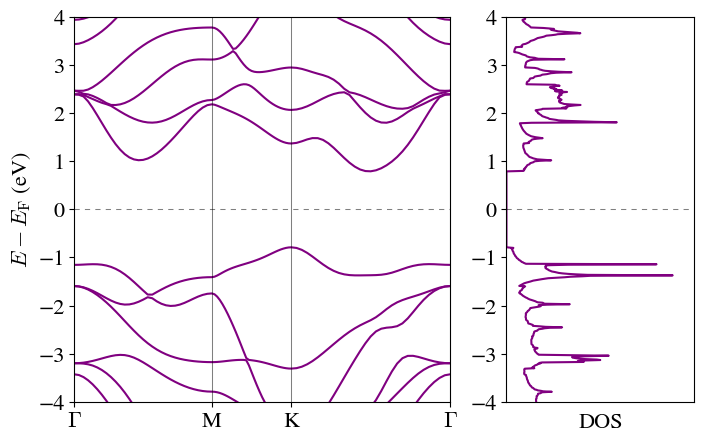

In [23]:
fig = plt.figure(figsize=(8,5))


spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2,1], wspace=0.2,
                         hspace=0.3)

#--------BAND STRUCTURE
ax0 = fig.add_subplot(spec[0])
k = np.unique(bands_wsse[:, 0])
bands = np.reshape(bands_wsse[:, 1], (-1, len(k)))

for band in range(len(bands)):
    ax0.plot(k, bands[band, :]-Fermi, color = 'purple', linewidth=1.5)
    ax0.set_ylim([-4,4])
    ax0.set_xlim([min(k),max(k)])


ax0.axhline(0, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
ax0.axvline(0.5774, linewidth=0.75, color='k', alpha=0.5)
ax0.axvline(0.9107, linewidth=0.75, color='k', alpha=0.5)
ax0.set_xticks(ticks= [0, 0.5774, 0.9107, 1.5774],
                       labels=['$\Gamma$', 'M', 'K', '$\Gamma$'])
ax0.set_ylabel(r'$E-E_\mathrm{F}$ (eV)')

#--------DOS
ax1 = fig.add_subplot(spec[1])
ax1.plot(dos_wsse, e_wsse-Fermi,linewidth=1.5, color='purple')
ax1.set_ylim([-4,4])
ax1.axhline(0, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
ax1.set_xticks([])
ax1.set_xlim([0,15])
ax1.set_xlabel('DOS')


plt.show()

## Separated Plot 

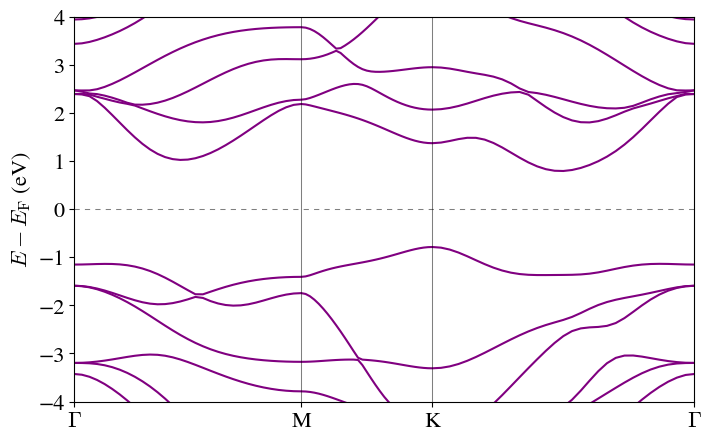

In [30]:
#--------BAND STRUCTURE
fig = plt.figure(figsize=(8,5))
k = np.unique(bands_wsse[:, 0])
bands = np.reshape(bands_wsse[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :]-Fermi, color = 'purple', linewidth=1.5)
    plt.ylim([-4,4])
    plt.xlim([min(k),max(k)])


plt.axhline(0, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
plt.axvline(0.5774, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(0.9107, linewidth=0.75, color='k', alpha=0.5)
plt.xticks(ticks= [0, 0.5774, 0.9107, 1.5774],
                       labels=['$\Gamma$', 'M', 'K', '$\Gamma$'])
plt.ylabel(r'$E-E_\mathrm{F}$ (eV)')

plt.show()

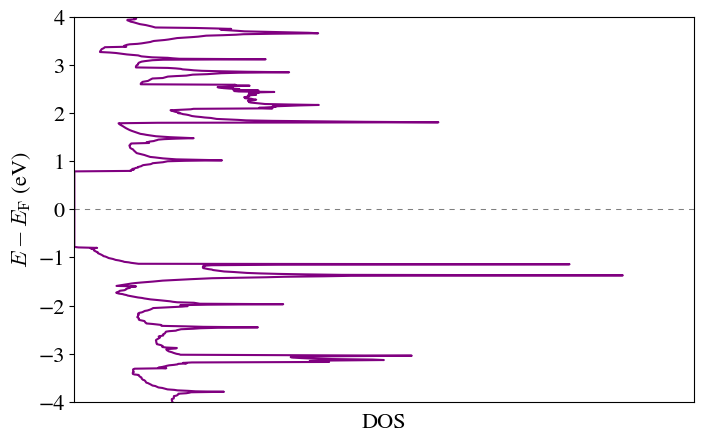

In [32]:
#--------DOS
fig = plt.figure(figsize=(8,5))
plt.plot(dos_wsse, e_wsse-Fermi,linewidth=1.5, color='purple')
plt.ylim([-4,4])
plt.axhline(0, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
plt.xticks([])
plt.xlim([0,15])
plt.xlabel('DOS')
plt.ylabel(r'$E-E_\mathrm{F}$ (eV)')

plt.show()